In [1]:
%matplotlib widget

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os, glob

import seaborn as sns
mako = sns.color_palette("mako", as_cmap=True)

plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['figure.dpi'] = 150
plt.ioff()

In [7]:
data = {} # data[L, p] contains density
for f in glob.glob('data/run_5/run_5_*_*.npy'):
    L = int(f.split("_")[3])
    p = int(f.split("_")[4].split(".")[0])
    data[L, p] = np.load(f)
data[200, 6] = np.NaN
data[200, 5] = np.NaN
data[200, 4] = np.NaN
data[200, 3] = np.NaN
data[200, 2] = np.NaN
data[200, 1] = np.NaN

In [8]:
density = np.zeros((2, 10))
for L, p in data:
    density[L//100-1,10-p] = data[L, p]

In [11]:
L_ticks = np.linspace(100, 200, 2)
p_ticks = np.logspace(-10, -1, 10, base = 2)
p_labels = [f"1/{int(2**i)}" for i in range(10, 0, -1)]

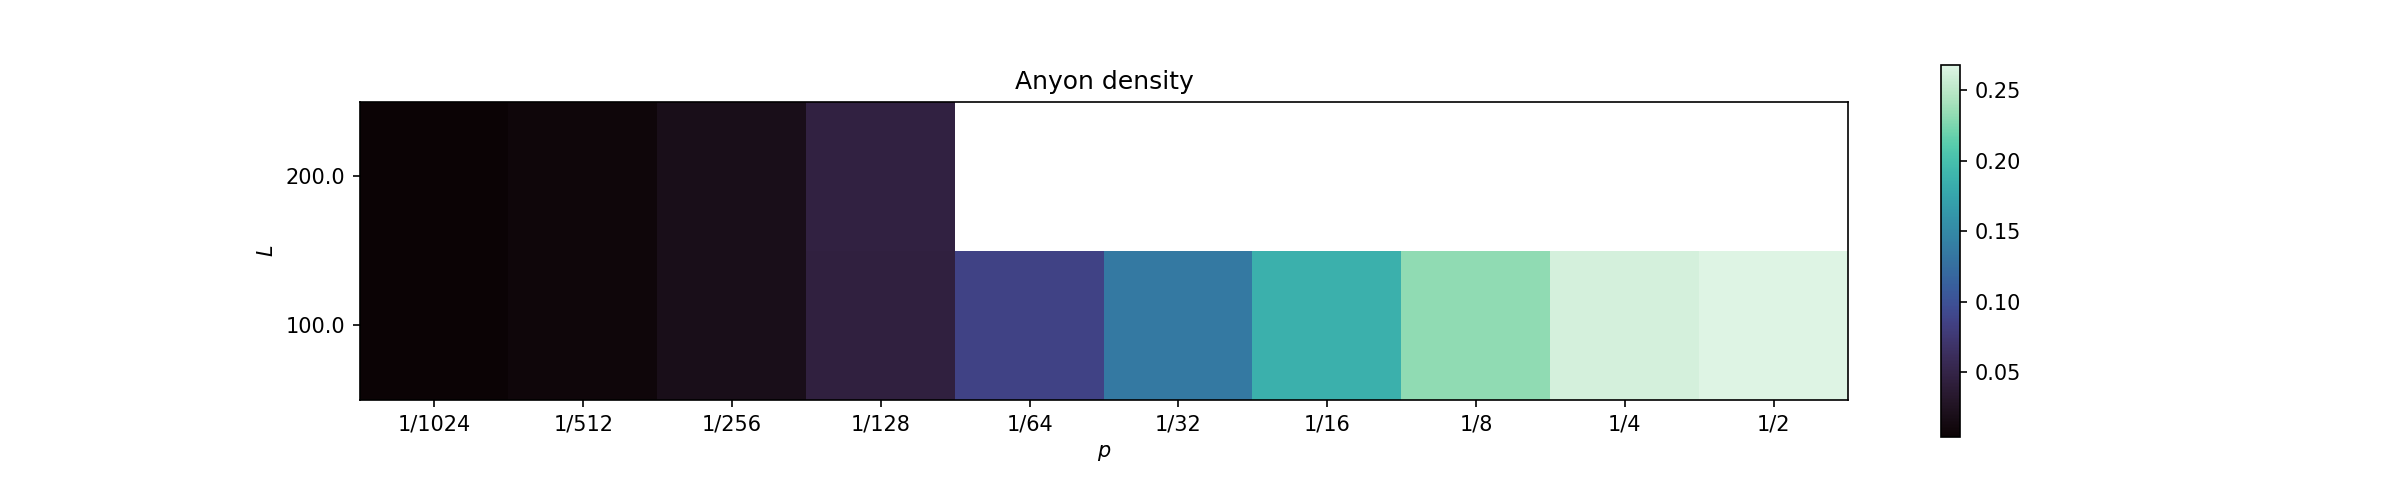

In [13]:
plt.matshow(density, cmap = mako, origin = 'lower')
plt.colorbar()
plt.title("Anyon density")
plt.ylabel("$L$")
plt.xlabel("$p$")
plt.yticks(range(2), L_ticks)
plt.xticks(range(10), p_labels)
ax = plt.gca()
ax.xaxis.tick_bottom()
plt.savefig("plots/run5_density_heatmap.png")
plt.show()

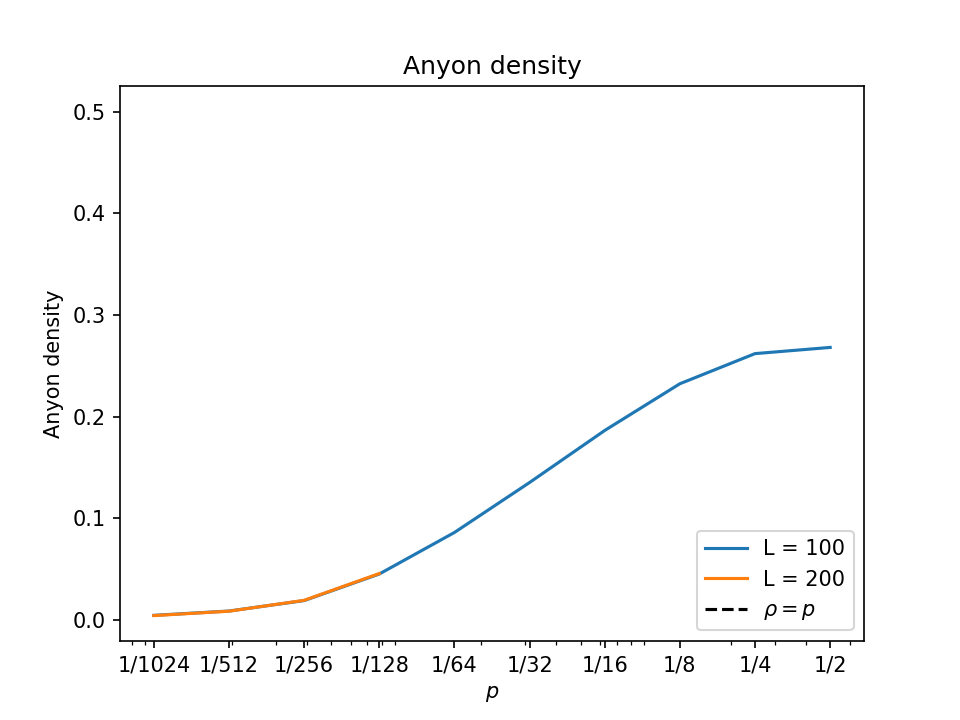

In [15]:
for i in range(2):
    L = 100*(i+1)
    plt.plot(p_ticks, density[i], label = f"L = {L}")
    error = np.sqrt(density[i] * (1 - density[i])) / (100 * L)
    plt.fill_between(p_ticks, density[i]-error, density[i]+error, alpha = 0.5)
plt.title("Anyon density")
plt.xlabel("$p$")
plt.ylabel("Anyon density")
plt.plot([p_ticks[0], p_ticks[0]], [p_ticks[-1], p_ticks[-1]], 'k--', label = r"$\rho=p$")
plt.xscale('log')
plt.xticks(p_ticks, p_labels)
plt.legend(loc = 'lower right')
plt.savefig("plots/run5_density_log.png")
plt.show()

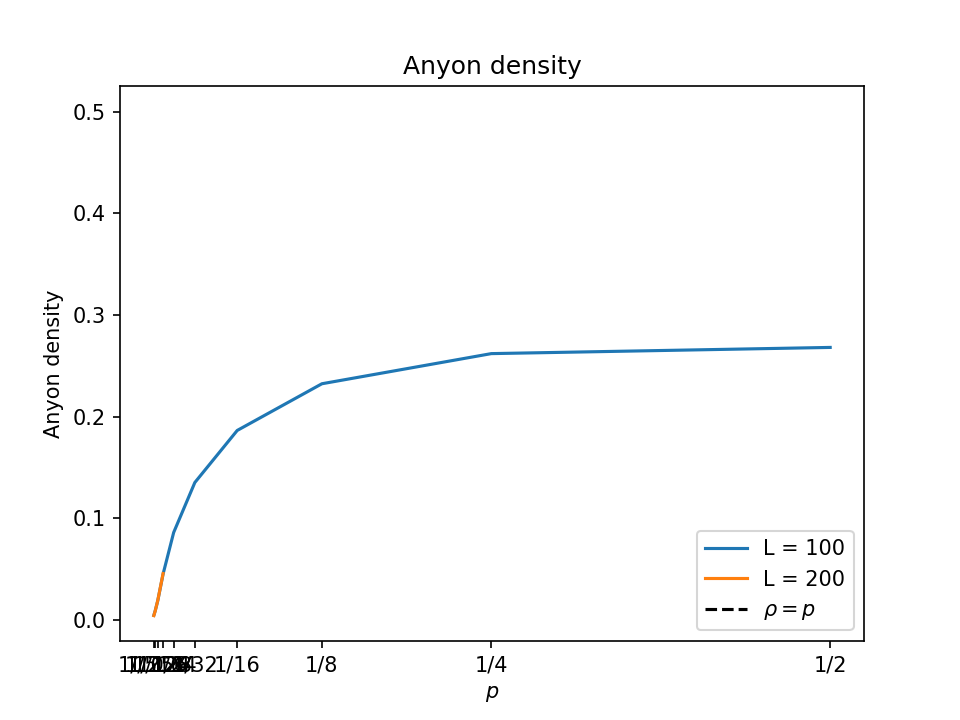

In [16]:
for i in range(2):
    L = 100*(i+1)
    plt.plot(p_ticks, density[i], label = f"L = {L}")
    error = np.sqrt(density[i] * (1 - density[i])) / (100 * L)
    plt.fill_between(p_ticks, density[i]-error, density[i]+error, alpha = 0.5)
plt.title("Anyon density")
plt.xlabel("$p$")
plt.ylabel("Anyon density")
plt.plot([p_ticks[0], p_ticks[0]], [p_ticks[-1], p_ticks[-1]], 'k--', label = r"$\rho=p$")
# plt.xscale('log')
plt.xticks(p_ticks, p_labels)
plt.legend(loc = 'lower right')
plt.savefig("plots/run5_density_line.png")
plt.show()